In [1]:
import torch
from torch import nn
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from helper_functions import plot_predictions, plot_decision_boundary, accuracy_fn

# Ejercicios - Clasificación

1) Make a binary classification dataset with Scikit-Learn's make_moons() function.
-   For consistency, the dataset should have 1000 samples and a random_state=42.
-   Turn the data into PyTorch tensors. Split the data into training and test sets using train_test_split with 80% training and 20% testing.

In [2]:
X_moon, y_moon = make_moons(n_samples=1000, noise=0.25, shuffle=True, random_state=42)

#array to tensor
X_moon, y_moon = torch.from_numpy(X_moon).type(torch.float), torch.from_numpy(y_moon).type(torch.float)

#split data
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moon, y_moon, test_size=0.2, random_state=42)

tensor([[-0.1418,  0.5582],
        [ 1.1980, -0.3040],
        [ 0.7594,  0.1103],
        [ 0.0233, -0.6036],
        [-0.8080,  0.5485]]) tensor([1., 1., 1., 1., 0.])


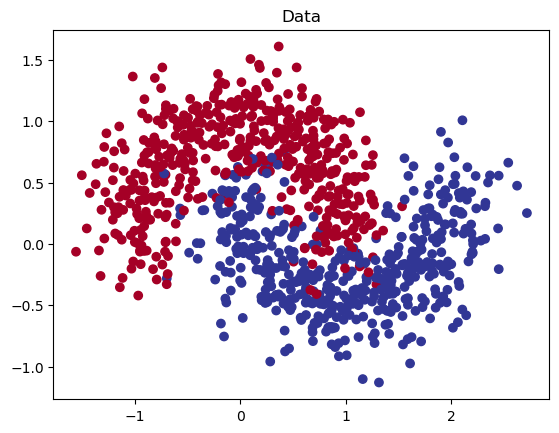

In [3]:
#visualize data
print(X_moon[:5], y_moon[:5])

plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon, cmap = plt.cm.RdYlBu)
plt.title("Data")
plt.show()

2) Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1. Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=16),
    nn.ReLU(),
    nn.Linear(in_features=16, out_features=16),
    nn.ReLU(),
    nn.Linear(in_features=16, out_features=16),
    nn.ReLU(),
    nn.Linear(in_features=16, out_features=1),
).to(device)

3) Setup a binary classification compatible loss function and optimizer to use when training the model.

In [5]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

4) Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
- To measure model accuray, you can create your own accuracy function or use the accuracy function in TorchMetrics.
- Train the model for long enough for it to reach over 96% accuracy.
- The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [6]:
from torchmetrics.classification import BinaryAccuracy
torchmetrics_accuracy_1 = BinaryAccuracy().to(device)

In [7]:
torch.manual_seed(42)

epochs = 1000

X_train_regression, y_train_regression,  = X_moon_train.to(device), y_moon_train.to(device)
X_test_regression, y_test_regression =  X_moon_test.to(device), y_moon_test.to(device)

for epoch in range(epochs):
    model_1.train()
    y_logits = model_1(X_moon_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_moon_train)
    acc = torchmetrics_accuracy_1(y_pred, y_moon_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_1.eval()

    with torch.inference_mode():
        test_logits = model_1(X_moon_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_moon_test)
        test_acc = torchmetrics_accuracy_1(test_preds, y_moon_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.2f}, Acc: {acc:.2f}% | Test loss: {test_loss:.2f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69, Acc: 0.50% | Test loss: 0.69, Test acc: 0.50%
Epoch: 100 | Loss: 0.56, Acc: 0.82% | Test loss: 0.57, Test acc: 0.80%
Epoch: 200 | Loss: 0.31, Acc: 0.87% | Test loss: 0.32, Test acc: 0.85%
Epoch: 300 | Loss: 0.29, Acc: 0.88% | Test loss: 0.29, Test acc: 0.86%
Epoch: 400 | Loss: 0.26, Acc: 0.89% | Test loss: 0.26, Test acc: 0.88%
Epoch: 500 | Loss: 0.23, Acc: 0.90% | Test loss: 0.22, Test acc: 0.91%
Epoch: 600 | Loss: 0.19, Acc: 0.92% | Test loss: 0.18, Test acc: 0.93%
Epoch: 700 | Loss: 0.17, Acc: 0.94% | Test loss: 0.15, Test acc: 0.94%
Epoch: 800 | Loss: 0.16, Acc: 0.95% | Test loss: 0.13, Test acc: 0.97%
Epoch: 900 | Loss: 0.20, Acc: 0.91% | Test loss: 0.17, Test acc: 0.92%


5) Make predictions with your trained model and plot them using the plot_decision_boundary() function created in this notebook.

In [8]:
model_1.eval()

with torch.inference_mode():
    test_logits = model_1(X_moon_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

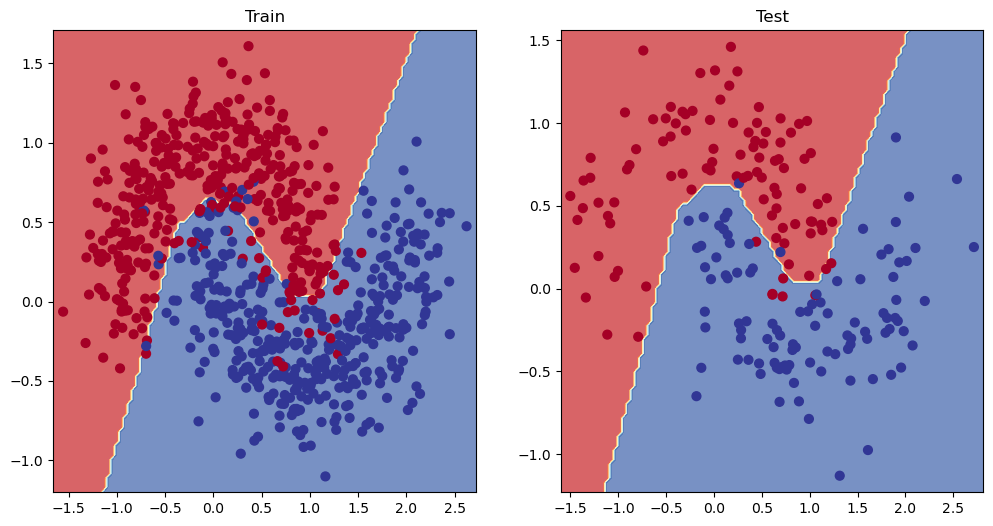

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_moon_train, y_moon_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_moon_test, y_moon_test)

plt.show()

6) Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch. Feel free to reference the ML cheatsheet website for the formula.


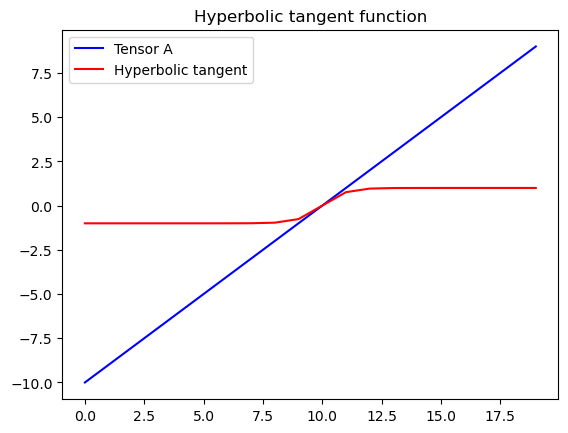

In [10]:
def tanh(x: torch.Tensor) -> torch.Tensor:
    return (torch.exp(x)- torch.exp(-x))/(torch.exp(x) + torch.exp(-x))

A = torch.arange(-10, 10, 1)
t = tanh(A)

plt.plot(A, label="Tensor A", color="blue")
plt.plot(t, label="Hyperbolic tangent", color="red")
plt.title("Hyperbolic tangent function")
plt.legend()
plt.show()

https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html#torch.nn.Tanh

7) Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).
- Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
- Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
- Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).
- Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dataset too.

In [22]:
# Code for creating a spiral dataset from CS231n

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X_spiral = np.zeros((N*K,D)) # data matrix (each row = single example)
y_spiral = np.zeros(N*K, dtype='uint8') # class labels

for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X_spiral[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y_spiral[ix] = j

X_spiral, y_spiral = torch.from_numpy(X_spiral).type(torch.float), torch.from_numpy(y_spiral).type(torch.LongTensor)

tensor([[-0.0000, 0.0000],
        [0.0017, 0.0100],
        [0.0027, 0.0200],
        [0.0178, 0.0245],
        [0.0083, 0.0395]]) tensor([0, 0, 0, 0, 0])


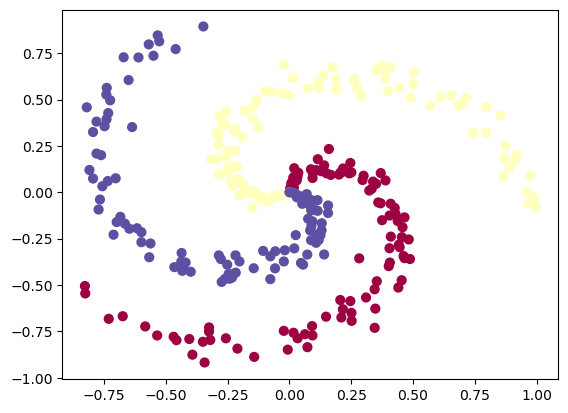

In [23]:
X_spiral_train, X_spiral_test, y_spiral_train, y_spiral_test = train_test_split(X_spiral, y_spiral, test_size=0.2, random_state=42)

print(X_spiral[:5], y_spiral[:5])

plt.scatter(X_spiral[:, 0], X_spiral[:, 1], c=y_spiral, s=40, cmap=plt.cm.Spectral)
plt.show()

In [24]:
device = "cuda" if torch.cuda.is_available() else "cpu"

class SpiralModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """
        Initializes multi-class classification model.
        Input:
            - input_features: int type object. Number of input features to the model
            - output_features: int type object. Number of output features from the model (output classes)
            - hidden_units: int type object. Number of hidden units between layers. 8 by default.
        """
        super().__init__()

        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features),
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

In [25]:
model_2 = SpiralModel(input_features=2, output_features=3, hidden_units=16).to(device)

In [26]:
from torchmetrics.classification import MulticlassAccuracy

torchmetrics_accuracy_2 = MulticlassAccuracy(num_classes=K).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)


torch.manual_seed(42)
epochs = 1500

for epoch in range(epochs):
    #Train
    model_2.train()
    y_logits = model_2(X_spiral_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits, y_spiral_train)
    acc = torchmetrics_accuracy_2(y_pred, y_spiral_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.inference_mode():
        test_logits = model_2(X_spiral_test)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits, y_spiral_test)
        test_acc = torchmetrics_accuracy_2(test_preds, y_spiral_test)
    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.2f}, Acc: {acc:.2f}% | Test loss: {test_loss:.2f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.11, Acc: 0.33% | Test loss: 1.08, Test acc: 0.33%
Epoch: 100 | Loss: 0.92, Acc: 0.56% | Test loss: 0.97, Test acc: 0.52%
Epoch: 200 | Loss: 0.66, Acc: 0.60% | Test loss: 0.76, Test acc: 0.51%
Epoch: 300 | Loss: 0.52, Acc: 0.72% | Test loss: 0.62, Test acc: 0.57%
Epoch: 400 | Loss: 0.36, Acc: 0.82% | Test loss: 0.45, Test acc: 0.77%
Epoch: 500 | Loss: 0.28, Acc: 0.91% | Test loss: 0.33, Test acc: 0.91%
Epoch: 600 | Loss: 0.19, Acc: 0.93% | Test loss: 0.24, Test acc: 0.91%
Epoch: 700 | Loss: 0.13, Acc: 0.96% | Test loss: 0.19, Test acc: 0.94%
Epoch: 800 | Loss: 0.09, Acc: 0.98% | Test loss: 0.16, Test acc: 0.97%
Epoch: 900 | Loss: 0.07, Acc: 0.98% | Test loss: 0.15, Test acc: 0.98%
Epoch: 1000 | Loss: 0.06, Acc: 0.98% | Test loss: 0.15, Test acc: 0.98%
Epoch: 1100 | Loss: 0.06, Acc: 0.98% | Test loss: 0.14, Test acc: 0.98%
Epoch: 1200 | Loss: 0.05, Acc: 0.99% | Test loss: 0.13, Test acc: 0.98%
Epoch: 1300 | Loss: 0.05, Acc: 0.98% | Test loss: 0.14, Test acc: 0.98%
Epoc

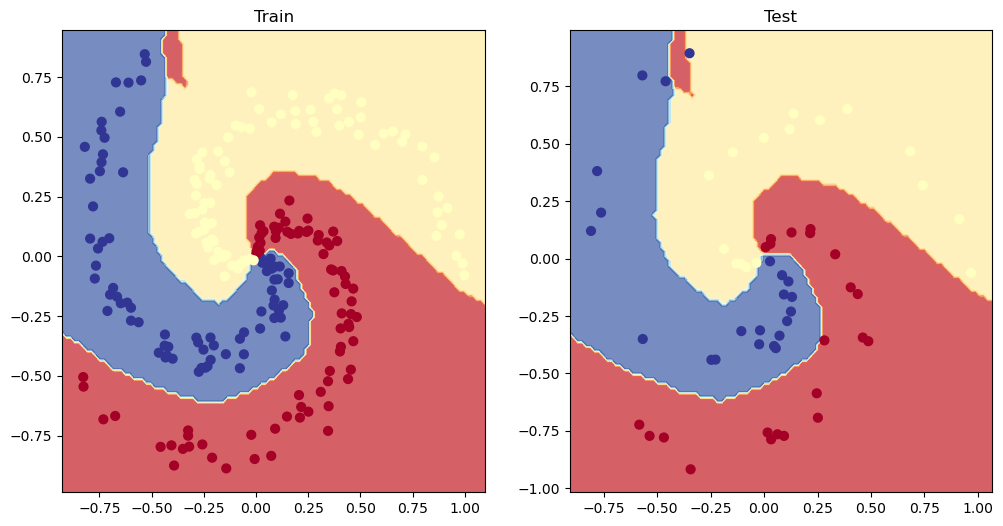

In [28]:
model_2.eval()

with torch.inference_mode():
    y_logits = model_2(X_spiral_test)
    y_pred = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_spiral_train, y_spiral_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_spiral_test, y_spiral_test)